In [70]:
import phonopy
import numpy as np
import matplotlib.pyplot as plt
import yaml

import types
from phonopy.structure.atoms import PhonopyAtoms

from modules.phonon_parser import parse_band_yaml
from ase import Atoms

In [101]:
with open("example/band_single.yaml", "r") as f:
    data = yaml.safe_load(f)
unit_cell_phonons, unit_cell_meta = parse_band_yaml(data)

In [102]:
def meta_to_ase_atoms(meta):
    """
    Convert the 'meta' dict from parse_band_yaml to an ASE Atoms object.
    Requires ASE to be installed.
    """
    

    # Lattice: (3,3) array in Angstrom
    lattice = meta.get("lattice")
    if lattice is None:
        raise ValueError("meta['lattice'] is missing or invalid")

    # Atoms: list of dicts with 'symbol', 'frac', 'mass'
    atoms = meta.get("atoms")
    if not atoms:
        raise ValueError("meta['atoms'] is missing or empty")

    symbols = [a["symbol"] for a in atoms]
    scaled_positions = [a["frac"] for a in atoms]
    masses = [a.get("mass") for a in atoms]

    # Construct ASE Atoms object
    ase_atoms = Atoms(
        symbols=symbols,
        scaled_positions=scaled_positions,
        cell=lattice,
        pbc=True,
        masses=masses,
    )
    return ase_atoms


In [103]:
def get_dx(eq, ts):
    """
    Compute atomic displacements (dx) from eq to ts, considering periodic boundary conditions.
    Returns an array of shape (natoms, 3) in Cartesian coordinates.
    Expects eq and ts to be ASE Atoms objects.
    """
    # Get lattice vectors (3,3)
    lattice = eq.get_cell()
    # Get fractional positions (N,3)
    frac_eq = eq.get_scaled_positions()
    frac_ts = ts.get_scaled_positions()
    # Compute shortest fractional displacement (wrap into [-0.5, 0.5))
    dfrac = frac_ts - frac_eq
    dfrac = (dfrac + 0.5) % 1.0 - 0.5
    # Convert to Cartesian
    dx = np.dot(dfrac, lattice)
    return dx

In [104]:
unti_cell_atoms = meta_to_ase_atoms(unit_cell_meta)

In [74]:
with open("example/band_ts2-3.yaml", "r") as f:
    data = yaml.safe_load(f)
ts_phonons, ts_meta = parse_band_yaml(data)
ts_atoms = meta_to_ase_atoms(ts_meta)

In [ ]:
with open("example/band_eq2.yaml", "r") as f:
    data = yaml.safe_load(f)
eq_phonons, eq_meta = parse_band_yaml(data)
eq_atoms = meta_to_ase_atoms(eq_meta)

In [ ]:
dx = get_dx(eq_atoms, ts_atoms)
print(dx)

[[ 4.50200837e-02 -2.39507891e-01 -5.58669882e-02]
 [ 3.85365071e-02 -2.86779214e-02 -5.47120261e-02]
 [ 8.94271940e-03 -3.04272628e-02  9.94216789e-02]
 [-2.85669517e-02 -8.33445726e-03  2.54520710e-02]
 [ 4.50200837e-02  9.32176172e-02 -2.14066266e-01]
 [ 3.85365071e-02 -1.85722237e-03  1.76996143e-02]
 [ 8.94271940e-03  2.16454779e-02  1.54429346e-02]
 [-2.85669517e-02  4.57246325e-02  1.84152697e-02]
 [ 2.43776408e-02 -1.38410230e-01  5.84198004e-01]
 [ 1.47866522e-02 -2.86905795e-02  1.49884634e-02]
 [ 2.43776408e-02 -9.18714075e-02  5.77133991e-02]
 [ 1.47866522e-02 -1.90805548e-02 -6.11322491e-04]
 [ 2.43776408e-02  7.32525778e-02  5.93051315e-02]
 [ 1.47866522e-02  2.01655912e-02  2.21720528e-02]
 [ 2.43776408e-02  6.34604265e-02 -8.79166864e-02]
 [ 1.47866522e-02  2.53557259e-02  1.00386257e-02]
 [ 7.44716479e-03  5.88083127e-01 -1.63422797e-01]
 [-1.58100532e-01  1.32161087e-02 -2.25792786e-02]
 [-6.29133572e-02  5.54088791e-02  4.82363995e-02]
 [ 2.23455128e-02  2.39482192e-

In [82]:
for i in unit_cell_phonons["eigenvectors"][0]:
    print(i)

print(np.array(unit_cell_phonons["eigenvectors"]).shape)

[[0j, 0j, (-0+0j)], [0j, 0j, (-0-0j)], [(0.01167233516935-0.01011748256805j), (-0.00024431632151+0.00052673002889j), (-0+0j)], [0j, 0j, (-0+0j)], [(-0.75501885197575+0.65444403048602j), (0.01580347256226-0.03407125446169j), (-0+0j)]]
[[0j, -0j, (-0+0j)], [-0j, -0j, (-0-0j)], [(0.0005149267338-0.00026830103823j), (0.00956952119142-0.01212563919913j), (-0+0j)], [-0j, -0j, 0j], [(-0.03330776453592+0.01735491132904j), (-0.61899943747951+0.78434058436219j), (-0+0j)]]
[[(0.17771920617695-0j), (0.8705093410495-0j), (-0-0j)], [(0.0750048303833-0j), (0.25927919289233-0j), (-0+0j)], [0j, -0j, -0j], [(0.05293325432151-0j), (0.36739082329394-0j), (-0-0j)], [-0j, 0j, -0j]]
[[(-0.8705093410495+0j), (0.17771920617695-0j), (-0+0j)], [(-0.36739082329394-0j), (0.05293325432151-0j), (-0+0j)], [0j, (-0-0j), -0j], [(-0.25927919289233-0j), (0.0750048303833-0j), (-0-0j)], [-0j, -0j, -0j]]
[[0j, -0j, (-0-0j)], [0j, -0j, (-0-0j)], [(-0-0j), (-0+0j), 0.09844601813211j], [0j, -0j, -0j], [-0j, (-0+0j), 0.99514239

In [83]:
from ase.build import make_supercell

# Create 2x2x2 supercell from unit_cell_atoms
P = np.diag([2, 2, 2])
supercell_atoms = make_supercell(unti_cell_atoms, P)

# Get the eigenvectors from the unit cell phonons
unit_eigvecs = np.array(unit_cell_phonons["eigenvectors"])  # [nq, nbranches, natoms, 3]
nq, nbranches, natoms, _ = unit_eigvecs.shape

# For a 2x2x2 supercell, the number of atoms increases by 8x
supercell_natoms = natoms * 8

# The eigenvectors for the supercell can be constructed by tiling the unit cell eigenvectors
# (This is a simplification: for Gamma point, the supercell eigenvectors are just repeated)
supercell_eigenvectors = []
for q in range(nq):
    q_eigvecs = []
    for b in range(nbranches):
        # Repeat the eigenvector for each image in the supercell
        eigvec = unit_eigvecs[q, b]  # shape: [natoms, 3]
        eigvec_super = np.tile(eigvec, (8, 1))  # shape: [supercell_natoms, 3]
        q_eigvecs.append(eigvec_super)
    supercell_eigenvectors.append(q_eigvecs)

# supercell_eigenvectors is [nq][nbranches][supercell_natoms][3]


In [ ]:
import numpy as np

def pbc_diff(a, b, cell):
    """
    Compute minimum-image difference between a and b under PBC.
    a, b: (3,) arrays (fractional coordinates)
    cell: (3,3) cell matrix (cartesian vectors as rows)
    Returns: cartesian vector from a to b (minimum image)
    """
    # Convert to fractional if not already
    # a, b are fractional
    d = b - a
    d -= np.round(d)  # wrap to [-0.5,0.5)
    return np.dot(d, cell)  # cartesian

# Get positions and symbols for mapping
supercell_pos = supercell_atoms.get_positions()  # (Nsuper, 3)
supercell_frac = supercell_atoms.get_scaled_positions()
supercell_syms = np.array(supercell_atoms.get_chemical_symbols())

ts_pos = ts_atoms.get_positions()  # (Nts, 3)
ts_frac = ts_atoms.get_scaled_positions()
ts_syms = np.array(ts_atoms.get_chemical_symbols())

cell = supercell_atoms.get_cell()  # (3,3)

# For each ts_atom (except last), find closest supercell atom of same type
mapping = []
used_super_idx = set()
for i in range(len(ts_atoms)-1):
    sym = ts_syms[i]
    frac = ts_frac[i]
    # Find all supercell atoms of same type not yet used
    candidates = np.where(supercell_syms == sym)[0]
    min_dist = None
    min_j = None
    for j in candidates:
        if j in used_super_idx:
            continue
        dvec = pbc_diff(frac, supercell_frac[j], np.eye(3))  # use fractional cell for wrapping
        # Convert to cartesian
        dvec_cart = np.dot(dvec, cell)
        dist = np.linalg.norm(dvec_cart)
        if (min_dist is None) or (dist < min_dist):
            min_dist = dist
            min_j = j
    if min_j is not None:
        mapping.append(min_j)
        used_super_idx.add(min_j)
    else:
        raise RuntimeError(f"No matching supercell atom found for ts atom {i} ({sym})")

# Now rearrange supercell_eigenvectors to match ts_atoms order (except last atom)
# supercell_eigenvectors: [nq][nbranches][supercell_natoms][3]

rearranged_supercell_eigenvectors = []
for q in range(len(supercell_eigenvectors)):
    q_eigvecs = []
    for b in range(len(supercell_eigenvectors[q])):
        eigvecs = supercell_eigenvectors[q][b]  # [supercell_natoms, 3]
        # Rearranged: [eigvecs[mapping[0]], eigvecs[mapping[1]], ..., eigvecs[mapping[-1]]]
        eigvecs_rearr = np.array([eigvecs[j] for j in mapping])
        q_eigvecs.append(eigvecs_rearr)
    rearranged_supercell_eigenvectors.append(q_eigvecs)
# rearranged_supercell_eigenvectors: [nq][nbranches][len(ts_atoms)-1][3]


In [96]:
print(np.array(rearranged_supercell_eigenvectors).shape)
print(np.array(unit_cell_phonons["eigenvectors"]).shape)

(204, 15, 40, 3)
(204, 15, 5, 3)


In [ ]:
# Calculate the modulus of projection of dx[:-1] onto each eigenvector
# rearranged_supercell_eigenvectors: [nq][nbranches][len(ts_atoms)-1][3]
# dx: [len(ts_atoms), 3] (assumed from context)
# We want: projections_modulus: [nq, nbranches]

dx_vec = dx[:-1]  # shape: (len(ts_atoms)-1, 3)
dx_vec_flat = dx_vec.flatten()  # shape: ((len(ts_atoms)-1)*3,)

projections_modulus = []
for q in range(len(rearranged_supercell_eigenvectors)):
    q_proj = []
    for b in range(len(rearranged_supercell_eigenvectors[q])):
        eigvec = rearranged_supercell_eigenvectors[q][b]  # shape: (len(ts_atoms)-1, 3)
        eigvec_flat = eigvec.flatten()  # shape: ((len(ts_atoms)-1)*3,)
        # If eigenvectors are complex, use conjugate for projection
        proj = np.vdot(eigvec_flat, dx_vec_flat)  # vdot does conjugate on first arg
        q_proj.append(np.abs(proj))
    projections_modulus.append(q_proj)
projections_modulus = np.array(projections_modulus)  # shape: (nq, nbranches)
print(projections_modulus.shape)


(204, 15)


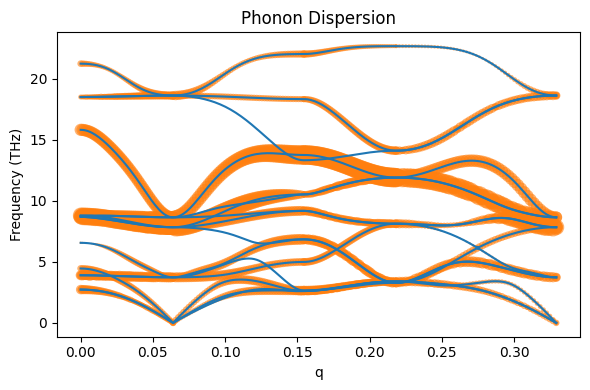

In [ ]:
import matplotlib.pyplot as plt

# unit_cell_phonons["frequencies"]: shape [nq, nbranches]
# unit_cell_phonons["q"]: shape [nq]

freqs = np.array(unit_cell_phonons["frequencies"])  # [nq, nbranches]
q = np.array(unit_cell_phonons["qpoints"])  # [nq]

plt.figure(figsize=(6,4))
for b in range(freqs.shape[1]):
    plt.plot(q, freqs[:, b], color="C0")

# Overlay scatter plot: point size proportional to projection_modulus
# Normalize projection_modulus for point size scaling
proj = projections_modulus
min_size = 0
max_size = 200
proj_norm = (proj - proj.min()) / (proj.max() - proj.min() + 1e-12)
sizes = min_size + proj_norm * (max_size - min_size)

for b in range(freqs.shape[1]):
    plt.scatter(q, freqs[:, b], s=sizes[:, b], color="C1", alpha=0.6, edgecolors='none')

plt.xlabel("q")
plt.ylabel("Frequency (THz)")
plt.title("Phonon Dispersion")
plt.tight_layout()
plt.show()
